With the emergence of more and more palm oil-free products, it seems that palm oil is almost a thing of the past.  Spurred on by horror stories of orangutans without trees and burning trees giving way to rows of oil palm trees, more and more people are opting for these products. This seems a very reasonable choice. However, it could be that the solution to this problem takes a more counter-intuitive approach: choose palm oil instead. <br>
Using various charts, we will try to present relevant data in as clear a way as possible, so that you can learn more about these two sides of the discussion and make your own choice on which option is best.

In [13]:
import pandas as pd
import numpy as np
import plotly as py
import matplotlib.pyplot as plt

Deforestation


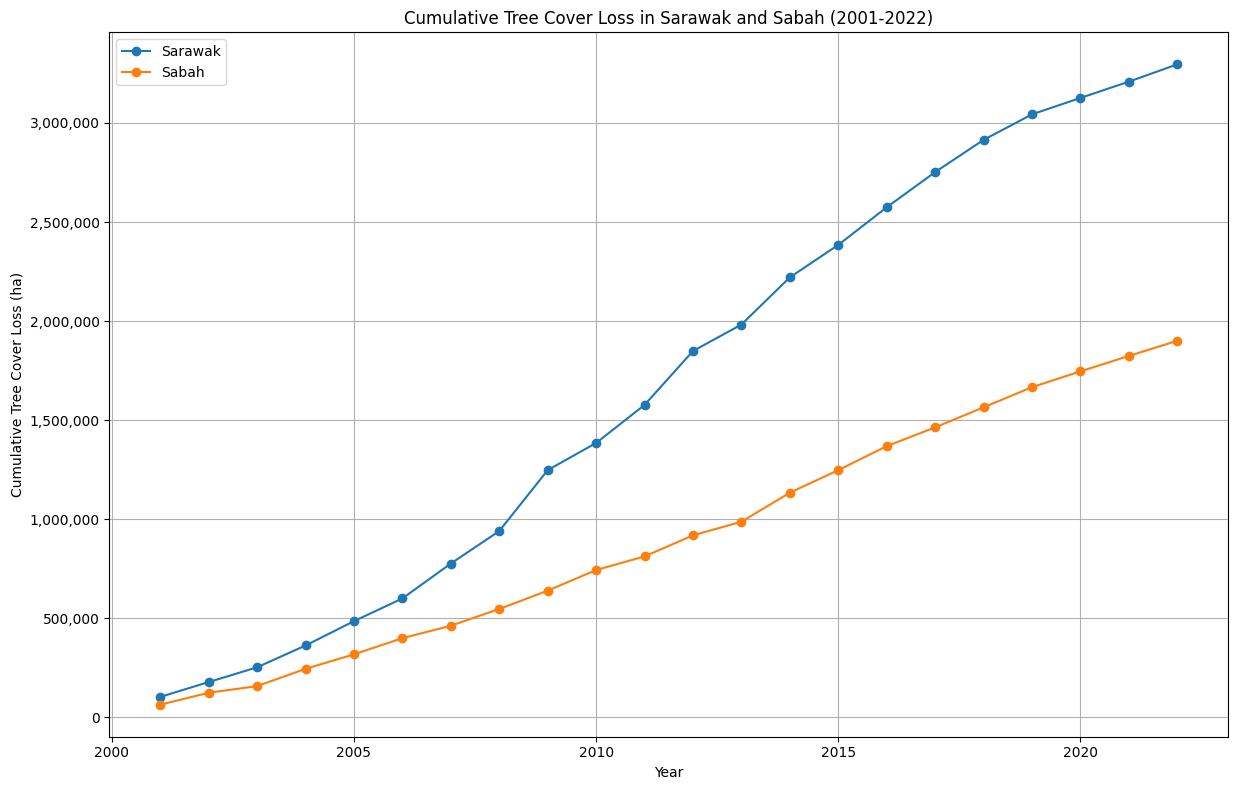

In [25]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('Datasets/Deforestation/Subnational 1 tree cover loss.csv')

# Define the years to plot
years = [f'tc_loss_ha_{year}' for year in range(2001, 2023)]

# List of provinces in Kalimantan
provinces = ['Sarawak', 'Sabah',]

plt.figure(figsize=(12, 8))

# Loop through each province
for province in provinces:
    # Filter the DataFrame for the current province and threshold == 0
    province_df = df[(df['subnational1'] == province) & (df['threshold'] == 0)]
    
    # Keep only relevant columns
    columns_to_keep = ['subnational1'] + years
    province_df = province_df[columns_to_keep]
    
    # Melt the DataFrame to long format
    province_df_long = province_df.melt(id_vars='subnational1', var_name='year', value_name='tc_loss_ha')
    
    # Extract year from the column name and convert to integer
    province_df_long['year'] = province_df_long['year'].str.extract(r'(\d+)').astype(int)
    
    # Sort the DataFrame by year
    province_df_long = province_df_long.sort_values(by='year')
    
    # Calculate cumulative tree loss
    province_df_long['cumulative_tc_loss_ha'] = province_df_long['tc_loss_ha'].cumsum()
    
    # Plot the cumulative tree loss for the current province
    plt.plot(province_df_long['year'], province_df_long['cumulative_tc_loss_ha'], marker='o', label=province)

# Plot settings
plt.title('Cumulative Tree Cover Loss in Sarawak and Sabah (2001-2022)')
plt.xlabel('Year')
plt.ylabel('Cumulative Tree Cover Loss (ha)')
plt.legend()
plt.grid(True)
plt.tight_layout()

# Set the y-axis to display numbers in plain format
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x):,}'))

plt.show()


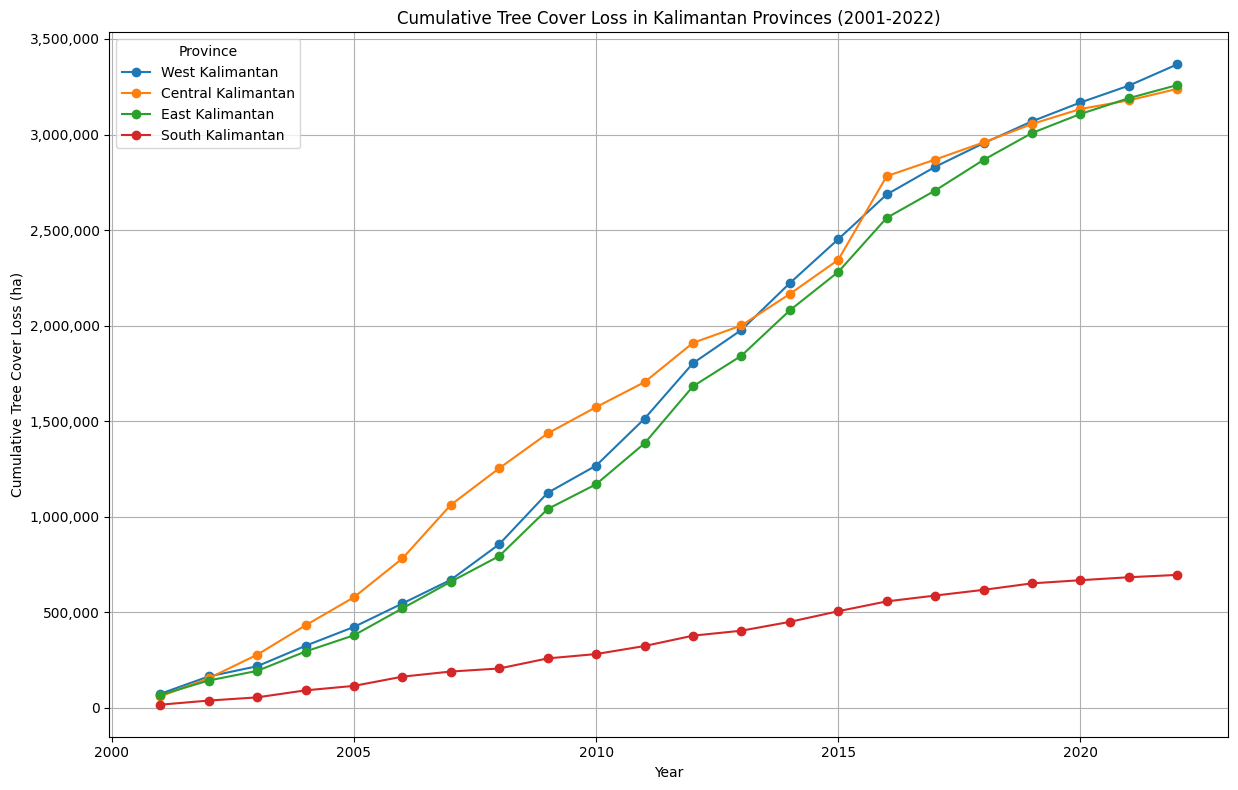

In [68]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('Datasets/Deforestation/Subnational 1 tree cover loss.csv')

# Define the years to plot
years = [f'tc_loss_ha_{year}' for year in range(2001, 2023)]

# Mapping dictionary from Indonesian to English names
province_mapping = {
    'Kalimantan Barat': 'West Kalimantan',
    'Kalimantan Tengah': 'Central Kalimantan',
    'Kalimantan Timur': 'East Kalimantan',
    'Kalimantan Selatan': 'South Kalimantan'
}

plt.figure(figsize=(12, 8))

# Loop through each province
for province_id, (province_indo, province_eng) in enumerate(province_mapping.items(), start=1):
    # Filter the DataFrame for the current province and threshold == 0
    province_df = df[(df['subnational1'] == province_indo) & (df['threshold'] == 0)]
    
    # Keep only relevant columns
    columns_to_keep = ['subnational1'] + years
    province_df = province_df[columns_to_keep]
    
    # Melt the DataFrame to long format
    province_df_long = province_df.melt(id_vars='subnational1', var_name='year', value_name='tc_loss_ha')
    
    # Extract year from the column name and convert to integer
    province_df_long['year'] = province_df_long['year'].str.extract(r'(\d+)').astype(int)
    
    # Sort the DataFrame by year
    province_df_long = province_df_long.sort_values(by='year')
    
    # Calculate cumulative tree loss
    province_df_long['cumulative_tc_loss_ha'] = province_df_long['tc_loss_ha'].cumsum()
    
    # Plot the cumulative tree loss for the current province
    plt.plot(province_df_long['year'], province_df_long['cumulative_tc_loss_ha'], marker='o', label=province_eng)

# Plot settings
plt.title('Cumulative Tree Cover Loss in Kalimantan Provinces (2001-2022)')
plt.xlabel('Year')
plt.ylabel('Cumulative Tree Cover Loss (ha)')
plt.legend(title='Province', loc='upper left')
plt.grid(True)
plt.tight_layout()

# Set the y-axis to display numbers in plain format
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x):,}'))

plt.show()


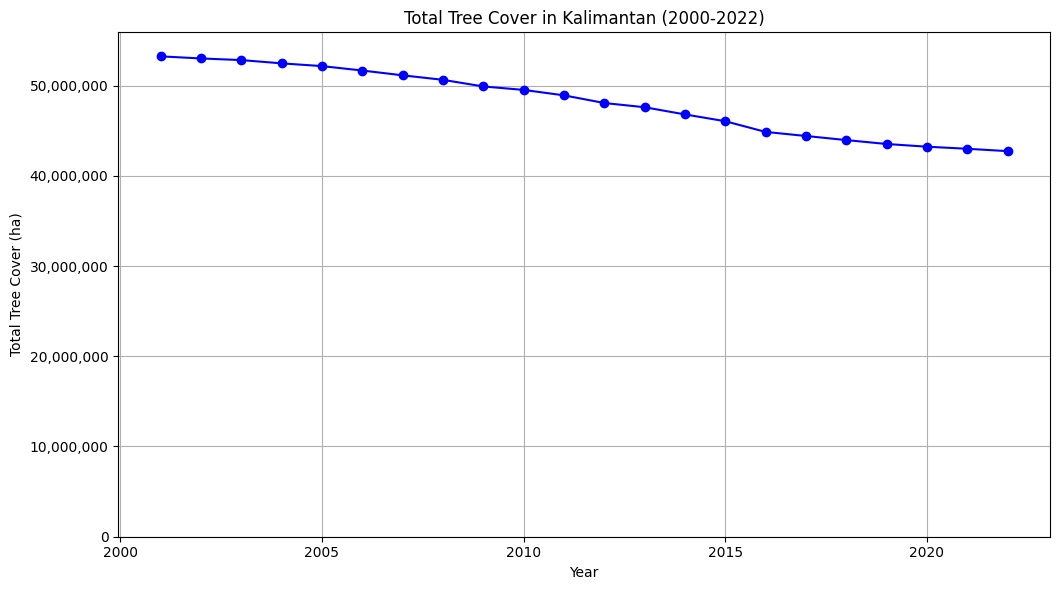

In [69]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('Datasets/Deforestation/Subnational 1 tree cover loss.csv')

# Filter for Kalimantan provinces and threshold == 0
provinces = ['Kalimantan Barat', 'Kalimantan Tengah', 'Kalimantan Timur', 'Kalimantan Selatan']
kalimantan_df = df[(df['subnational1'].isin(provinces)) & (df['threshold'] == 0)]

# Calculate initial tree cover in 2000
initial_extent_2000 = kalimantan_df['extent_2000_ha'].sum()

# Calculate tree cover gain spread over 22 years
gain_spread = (kalimantan_df['gain_2000-2020_ha'].sum()/22)

# Calculate cumulative tree cover losses from 2001 to 2022
years = range(2001, 2023)
cumulative_losses = []
for year in years:
    loss_column = f'tc_loss_ha_{year}'
    cumulative_loss = (kalimantan_df[loss_column].sum() - gain_spread)
    cumulative_losses.append(cumulative_loss)

# Calculate total tree cover per year
annual_tree_cover = []
for i, year in enumerate(years):
    total_tree_cover = initial_extent_2000 - sum(cumulative_losses[:i+1])
    annual_tree_cover.append(total_tree_cover)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(years, annual_tree_cover, marker='o', linestyle='-', color='b')
plt.title('Total Tree Cover in Kalimantan (2000-2022)')
plt.xlabel('Year')
plt.ylabel('Total Tree Cover (ha)')
plt.grid(True)
plt.ylim(0, max(annual_tree_cover) * 1.05) 
plt.tight_layout()

# Set the y-axis to display numbers in plain format
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x):,}'))

plt.show()


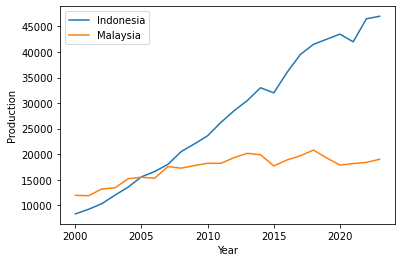

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

palm = pd.read_csv('Datasets/Oils/archive/cleaned/palm.csv')
a = palm[palm['Country'] == 'Indonesia']
b = palm[palm['Country'] == 'Malaysia']

indo = a.drop(a[a['Year'] < 2000].index)
mala = b.drop(b[b['Year'] < 2000].index)

xi = indo['Production'].values
xm = mala['Production'].values
y = range(2000, 2024)
plt.plot(y, xi, label='Indonesia')
plt.plot(y, xm, label='Malaysia')
plt.xlabel('Year')
plt.ylabel('Production')
plt.legend()
plt.show()